# ***CS722 Machine Learning***
## ***Assignment 4 | Herambeshwar pendyala | 01130541 | hpend001@odu.edu***

### Due: Nov. 28 th , end of the day

This is a programming homework assignment. You need to upload your code and a report to Blackboard by the specified due date. You can use either Python (preferred), or Matlab, or any other programming language in your choice.

### Problem 1
1. Implement your own K-means algorithm. Apply the algorithm to the dataset stored in file “A.txt” coming with this document. This dataset includes the coordinates of 174 2-D data points as plotted in the following figure.

<p align="center">
<img src="https://www.cs.odu.edu/~hpendyal/courses/cs722/images/hw4-1.PNG" width="450" height="400" /></p>


> (1) - Run your algorithm with different choices of K’s (ranging from 2 to 10 with step size 1). Calculate the Sum of Squared Errors (SSE) for clustering resulted from each run, and plot SSE against K in a figure as shown on 8th slide from lecture 15. Note for each K, multiple runs of the algorithm with different initial centroids may be needed, in order to have a curve that is monotonically non-increasing.

> (2) - Run your algorithm with K=3. Show the clustering results in a figure with varying colors or shapes of data points to represent different cluster assignment (as in those figures on7th slide from lecture 15). Note multiple runs may be needed in order to obtain a satisfactory clustering result.


### Problem 2
2. Implement your own agglomerative hierarchical clustering algorithm with Euclidean distance to measure distance between any pair of data points and four different ways to measure inter- cluster similarity: MIN, MAX, Group Average, and Distance between Centroids.Hierarchical clustering can work directly with distance matrix. However, if you prefer to work on similarity (proximity) matrix as in the examples shown in class, you can use the following formula to covert distance to similarity, s<sub>ij</sub> = 1/(1 + d<sub>ij</sub> ), where s<sub>ij</sub> represents the similarity between any two points i and j, and d<sub>ij</sub> is the distance between the two. 

> Apply your algorithm to the dataset stored in “B.txt” coming with this document to obtain two clusters. This dataset includes the coordinates of 218 2-D data points as plotted in Figure 2, with data points at the center from one cluster and those surrounding from the other. Show the clustering solutions resulted from all four ways of defining inter-cluster similarity in plots, with different signs (color or shape) representing different cluster assignment. Which inter-cluster similarity measure gives you the desired solution? Why?

<p align="center">
<img src="https://www.cs.odu.edu/~hpendyal/courses/cs722/images/hw4-2.PNG" width="450" height="400" /></p>

In [1]:
#--- Required Libraries
%matplotlib inline
from copy import deepcopy                   #--- use to copy
import numpy as np                          #--- Numpy for numeric calculations
import pandas as pd                         #--- For Data Representation and Analysis
from matplotlib import pyplot as plt        #--- for plotting the data

plt.rcParams['figure.figsize'] = (20, 10)
plt.style.use('ggplot')

In [2]:
#--- Importing the data
data_a = pd.read_csv('./A.txt', header=None, prefix = 'X', delimiter=' ')
data_b = pd.read_csv('./B.txt', header=None, prefix = 'X', delimiter=' ')

#--- Shape of given data
print('shape of A.txt : ',data_a.shape)
print('shape of B.txt : ',data_b.shape)

shape of A.txt :  (174, 2)
shape of B.txt :  (218, 2)


In [3]:
#--- Validating the data by displaying it
data_a.head()

,X0,X1
0,0.1394,0.8231
1,1.2149,1.8136
2,1.3823,0.8263
3,1.3726,0.8158
4,1.3694,0.8158


In [4]:
#--- Validating the data by displaying it
data_b.head()

,X0,X1
0,1.4629,1.7974
1,1.4984,1.5395
2,0.5565,0.7249
3,0.8081,1.9161
4,1.4016,0.8231


### ***Problem 1***

Implement your own K-means algorithm. Apply the algorithm to the dataset stored in file “A.txt” coming with this document. This dataset includes the coordinates of 174 2-D data points as plotted in the following figure.


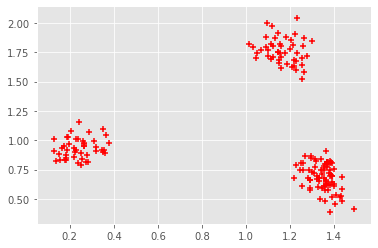

<Figure size 1080x1080 with 0 Axes>

In [5]:
#--- Displaying the Data using a scatterplot
f1 = data_a['X0'].values
f2 = data_a['X1'].values
X = np.array(list(zip(f1, f2)))
plt.scatter(f1, f2, marker='+', c='red')
plt.figure(figsize=(15,15))
plt.show()

#### 1.1

Run your algorithm with different choices of K’s (ranging from 2 to 10 with step size 1). Calculate the Sum of Squared Errors (SSE) for clustering resulted from each run, and plot SSE against K in a figure as shown on 8th slide from lecture 15. Note for each K, multiple runs of the algorithm with different initial centroids may be needed, in order to have a curve that is monotonically non-increasing.

In [6]:
#---- kmeans Class
"""
custom defined kmeans 
k - number of clusters
num_iterations - number of iterations the algorithm will run. 
both k,maxiterations are hyperparameters that can be tuned to get better performance of kmeans.

methods 
fit(data) - fit the data to the algorithm.
predict(data) - get the distances from the given data and centroids of calculated clusters then return the classified data
"""
class kmeans:
    def __init__(self, k = 2, num_iterations = 100):
        self.k=k
        self.num_iterations = num_iterations
    
    def fit(self,data):
        self.centroids = {}
        np.random.shuffle(data)
        for i in range(self.k):
            self.centroids[i] = data[i]
        self.sse = []
        for i in range(self.num_iterations):
            self.classifications = {}
            for i in range(self.k):
                self.classifications[i] = []
            dist = 0
            for features in data:
                distances = [np.linalg.norm(features - self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(features)
                dist += min(distances)**2
            self.sse.append(dist)
            
            prev_centroids = dict(self.centroids)
            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification],axis=0)

    
    def predict(self,data):
        distances = [np.linalg.norm(data - self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification


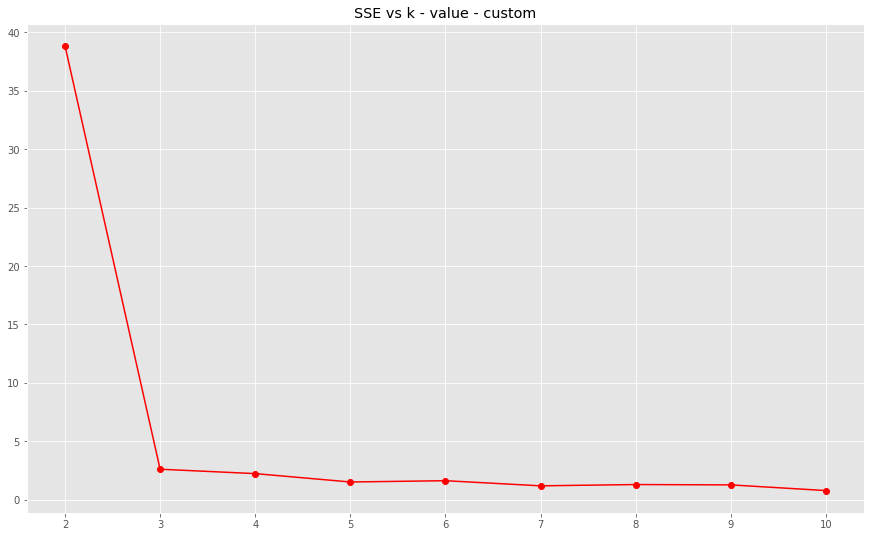

CPU times: user 55.6 s, sys: 34 ms, total: 55.7 s
Wall time: 55.6 s


In [7]:
%%time
#--- Multiple runs might required to get an optimal curve, I have used Below Parameters.
#--- num_iterations = 1000.
#--- num of runs - execute this cell 3 times if an optimal curve is not found.
k1= np.arange(2, 11)
squared_error = []
for k in range(2,11):
    model = kmeans(k=k, num_iterations=1000)
    model.fit(X)
    squared_error.append(min(model.sse))
squared_error = np.array(squared_error)

plt.figure(figsize=(15,9))
plt.plot(k1, squared_error, marker='o', color='red')
plt.title('SSE vs k - value - custom')
plt.show()

#### ***1.2***
Run your algorithm with K=3. Show the clustering results in a figure with varying colors or shapes of data points to represent different cluster assignment (as in those figures on7th slide from lecture 15). Note multiple runs may be needed in order to obtain a satisfactory clustering result.

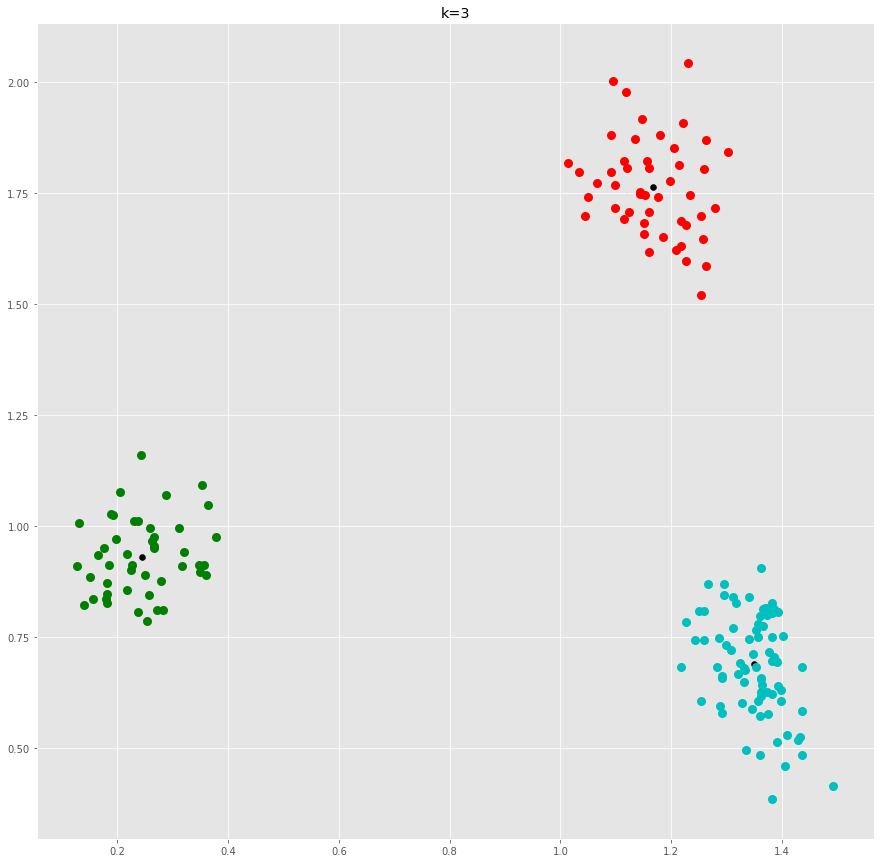

In [9]:
#--- THis requires multiple runs to get an optimal result
colors = 10*["g","r","c","b","k"]
model = kmeans(k=3)
model.fit(X)
plt.figure(figsize=(15,15))
for centroid in model.centroids:
    plt.scatter(model.centroids[centroid][0],model.centroids[centroid][1], marker="o",  color="k")
for classification in model.classifications:
    color = colors[classification]
    for features in model.classifications[classification]:
        plt.scatter(features[0], features[1], marker="o", color=color, linewidths=3)
plt.title('k=3')
plt.show()

Using the predefined library scikit-learn for problem 1

> 1.1

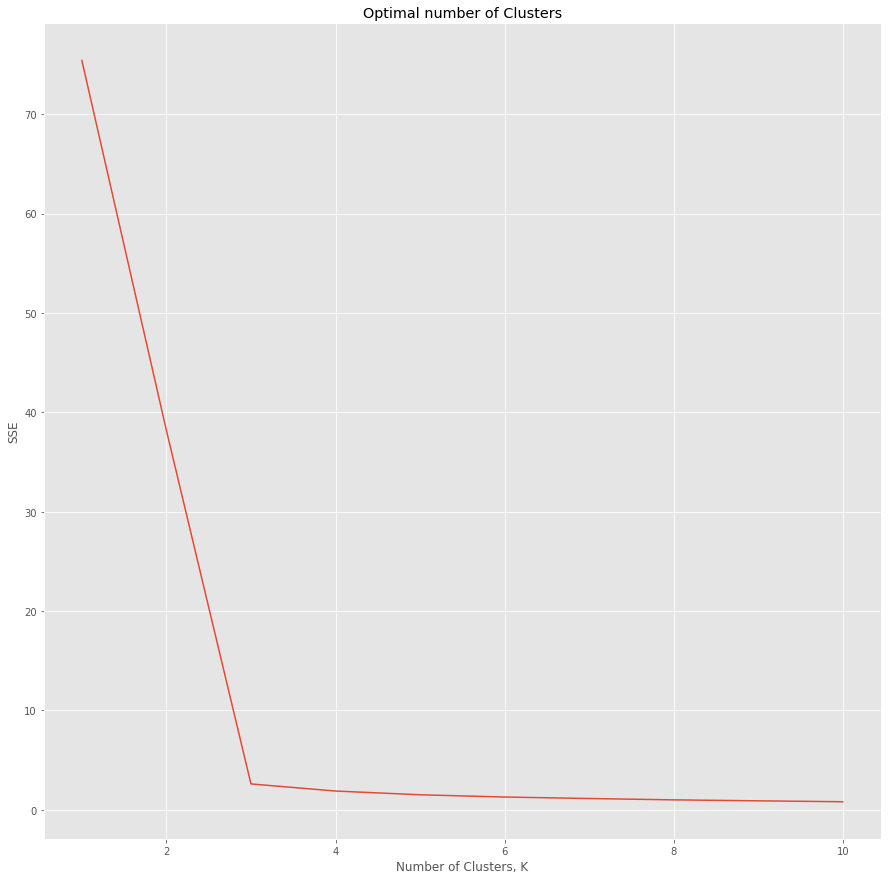

CPU times: user 948 ms, sys: 56 ms, total: 1 s
Wall time: 1 s


In [10]:
%%time
#---- using library
from sklearn.cluster import KMeans

#---- To get optimal number of clusters
sse = {}
for k in range(1, 11):
    kmeans_m = KMeans(n_clusters=k, max_iter=1000).fit(data_a)
    data_a["clusters"] = kmeans_m.labels_
    #print(data["clusters"])
    sse[k] = kmeans_m.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure(figsize=(15,15))
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel('Number of Clusters, K')
plt.ylabel('SSE')
plt.title('Optimal number of Clusters')
plt.show()

> 1.2

In [11]:
kmeans_m = KMeans(n_clusters=3)
kmeans_m.fit(data_a)
labels = kmeans_m.predict(data_a)

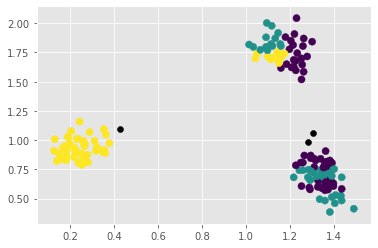

In [18]:
plt.scatter(data_a.X0, data_a.X1, c=labels, s=50, cmap='viridis')
centers = kmeans_m.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=None, alpha=None);

### ***Problem 2***

Implement your own agglomerative hierarchical clustering algorithm with Euclidean distance to measure distance between any pair of data points and four different ways to measure inter- cluster similarity: MIN, MAX, Group Average, and Distance between Centroids.Hierarchical clustering can work directly with distance matrix. However, if you prefer to work on similarity (proximity) matrix as in the examples shown in class, you can use the following formula to covert distance to similarity, s<sub>ij</sub> = 1/(1 + d<sub>ij</sub> ), where s<sub>ij</sub> represents the similarity between any two points i and j, and d<sub>ij</sub> is the distance between the two.

Apply your algorithm to the dataset stored in “B.txt” coming with this document to obtain two clusters. This dataset includes the coordinates of 218 2-D data points as plotted in Figure 2, with data points at the center from one cluster and those surrounding from the other. Show the clustering solutions resulted from all four ways of defining inter-cluster similarity in plots, with different signs (color or shape) representing different cluster assignment. Which inter-cluster similarity measure gives you the desired solution? Why?


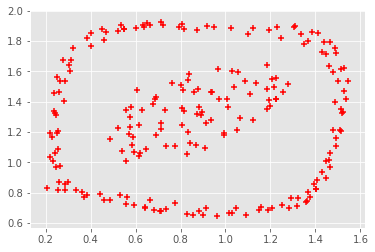

In [19]:
#--- Displaying th data 
f1 = data_b['X0'].values
f2 = data_b['X1'].values
X = np.array(list(zip(f1, f2)))
plt.scatter(f1, f2, c='red', marker='+')
plt.show()

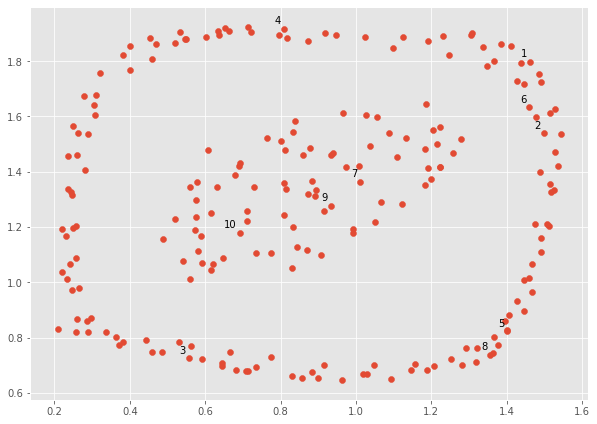

In [20]:
labels = range(1, 11)  
plt.figure(figsize=(10, 7))  
plt.subplots_adjust(bottom=0.1)  
plt.scatter(X[:,0],X[:,1], label='True Position')

for label, x, y in zip(labels, X[:, 0], X[:, 1]):  
    plt.annotate(
        label,
        xy=(x, y), xytext=(-3, 3),
        textcoords='offset points', ha='right', va='bottom')
plt.show()  

#### Single : MIN 

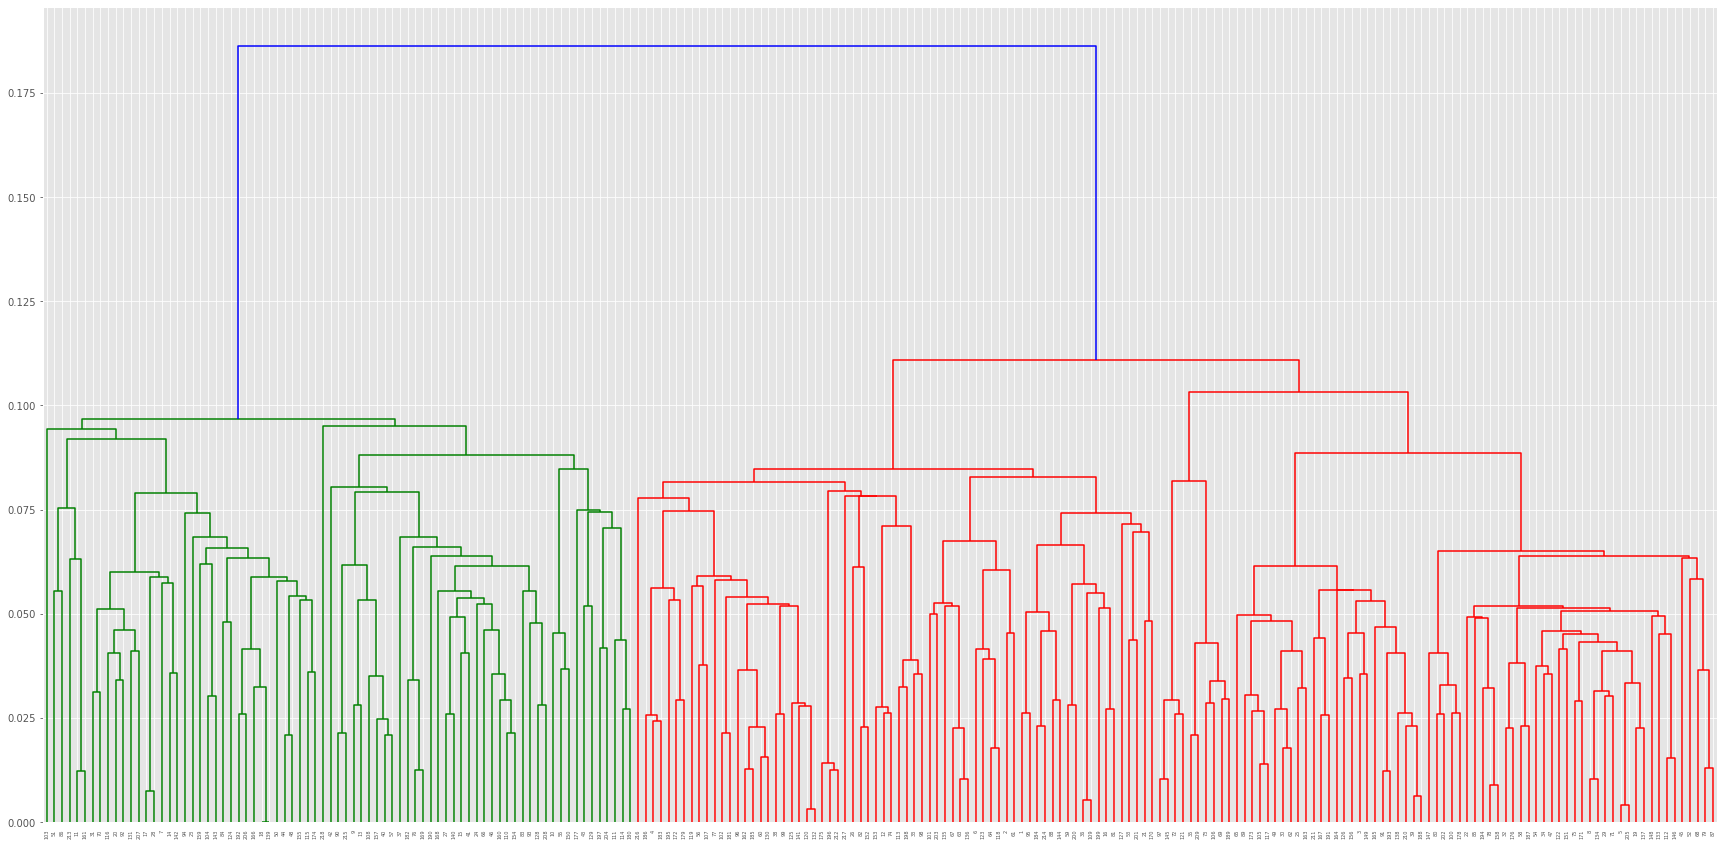

CPU times: user 4.03 s, sys: 160 ms, total: 4.19 s
Wall time: 4.19 s


In [21]:
%%time
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering 

linked = linkage(X, 'single')

labelList = range(1, 219)

plt.figure(figsize=(30, 15))  
dendrogram(linked,  
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show() 

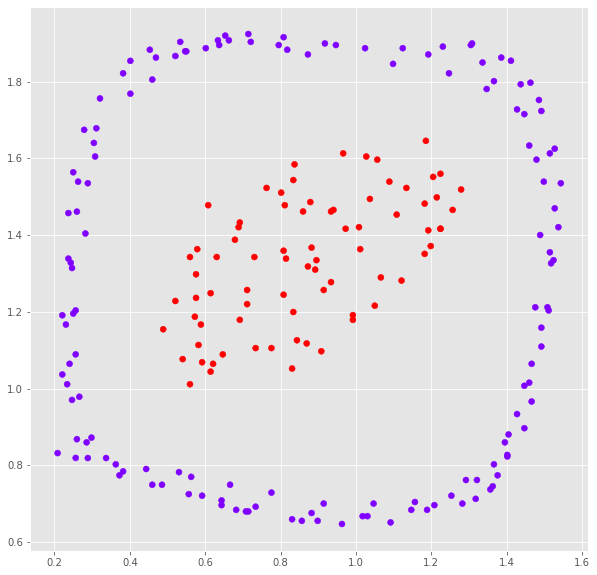

In [22]:
#----- validating agglomerative clustering values for all the above 
ac1 = AgglomerativeClustering(n_clusters = 2, linkage='single') 
  
# Visualizing the clustering 
plt.figure(figsize =(10, 10)) 
plt.scatter(data_b['X0'], data_b['X1'],  
           c = ac1.fit_predict(data_b), cmap ='rainbow') 
plt.show()

#### MAX

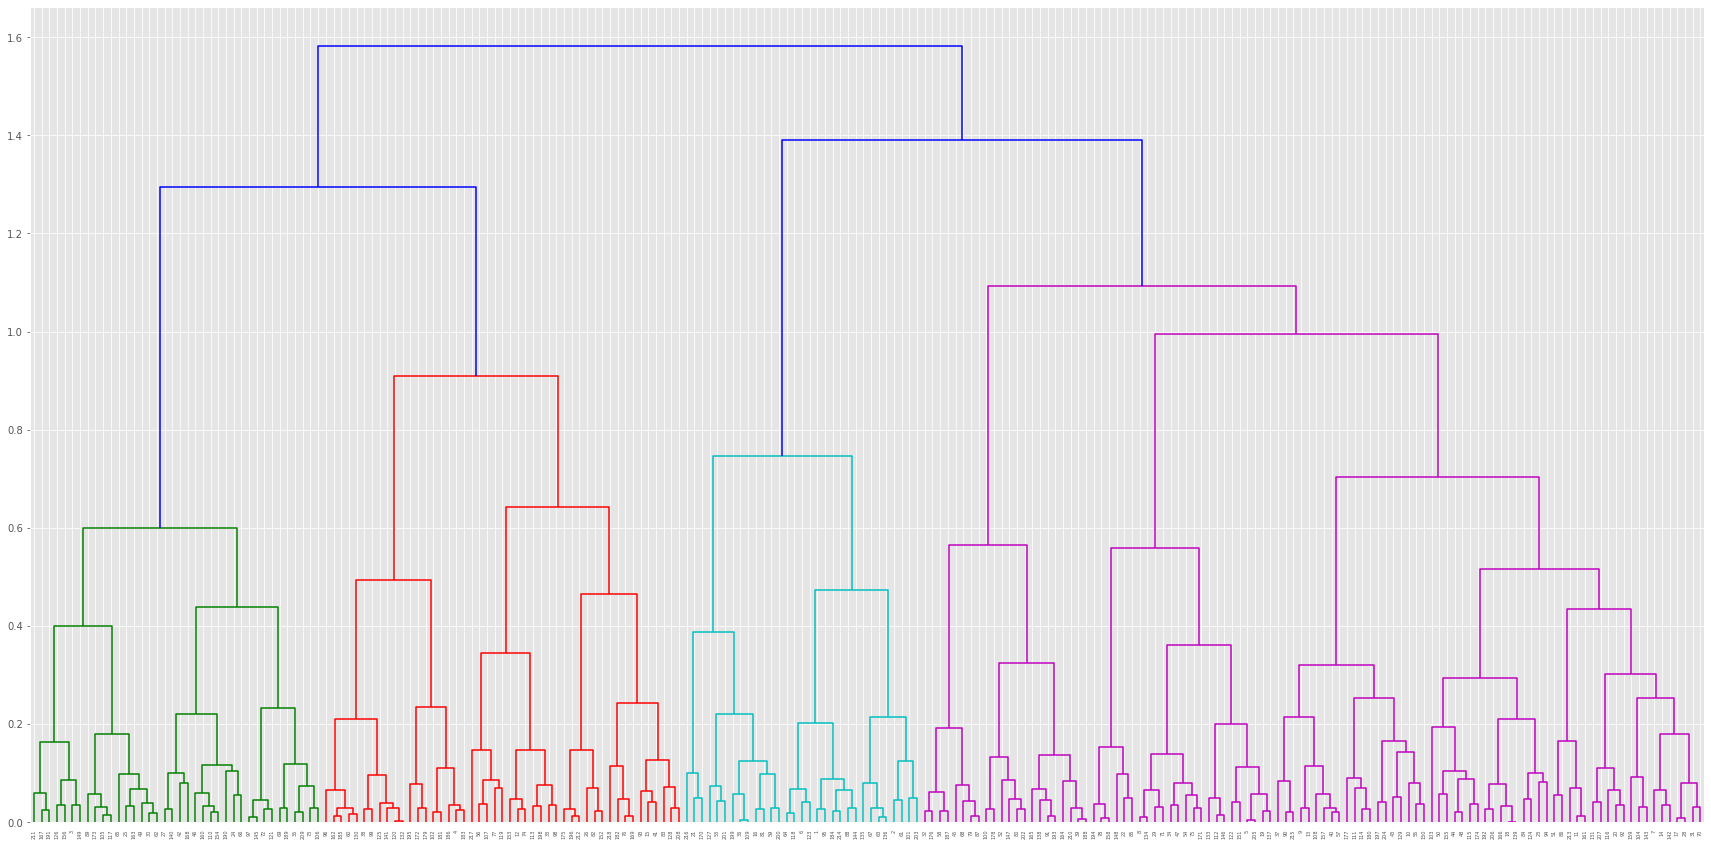

CPU times: user 4.12 s, sys: 108 ms, total: 4.22 s
Wall time: 4.22 s


In [23]:
%%time
linked = linkage(X, 'complete')

labelList = range(1, 219)

plt.figure(figsize=(30, 15))  
dendrogram(linked,  
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show() 

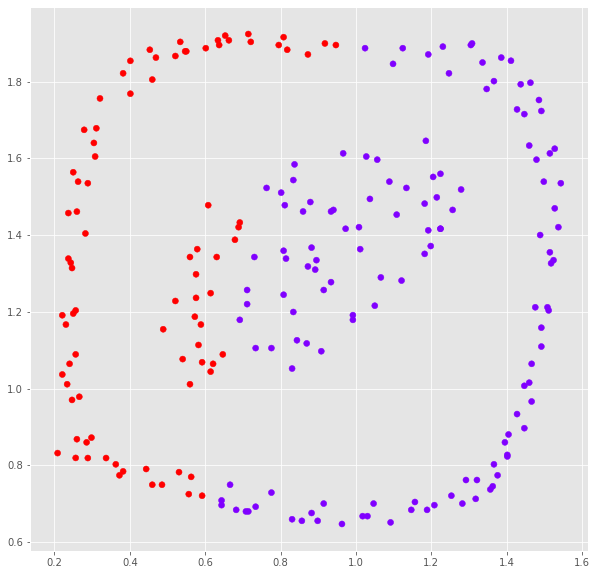

In [24]:
#----- validating agglomerative clustering values for all the above 
ac2 = AgglomerativeClustering(n_clusters = 2, linkage='complete') 
  
# Visualizing the clustering 
plt.figure(figsize =(10, 10)) 
plt.scatter(data_b['X0'], data_b['X1'],  
           c = ac2.fit_predict(data_b), cmap ='rainbow') 
plt.show()

#### Group Average

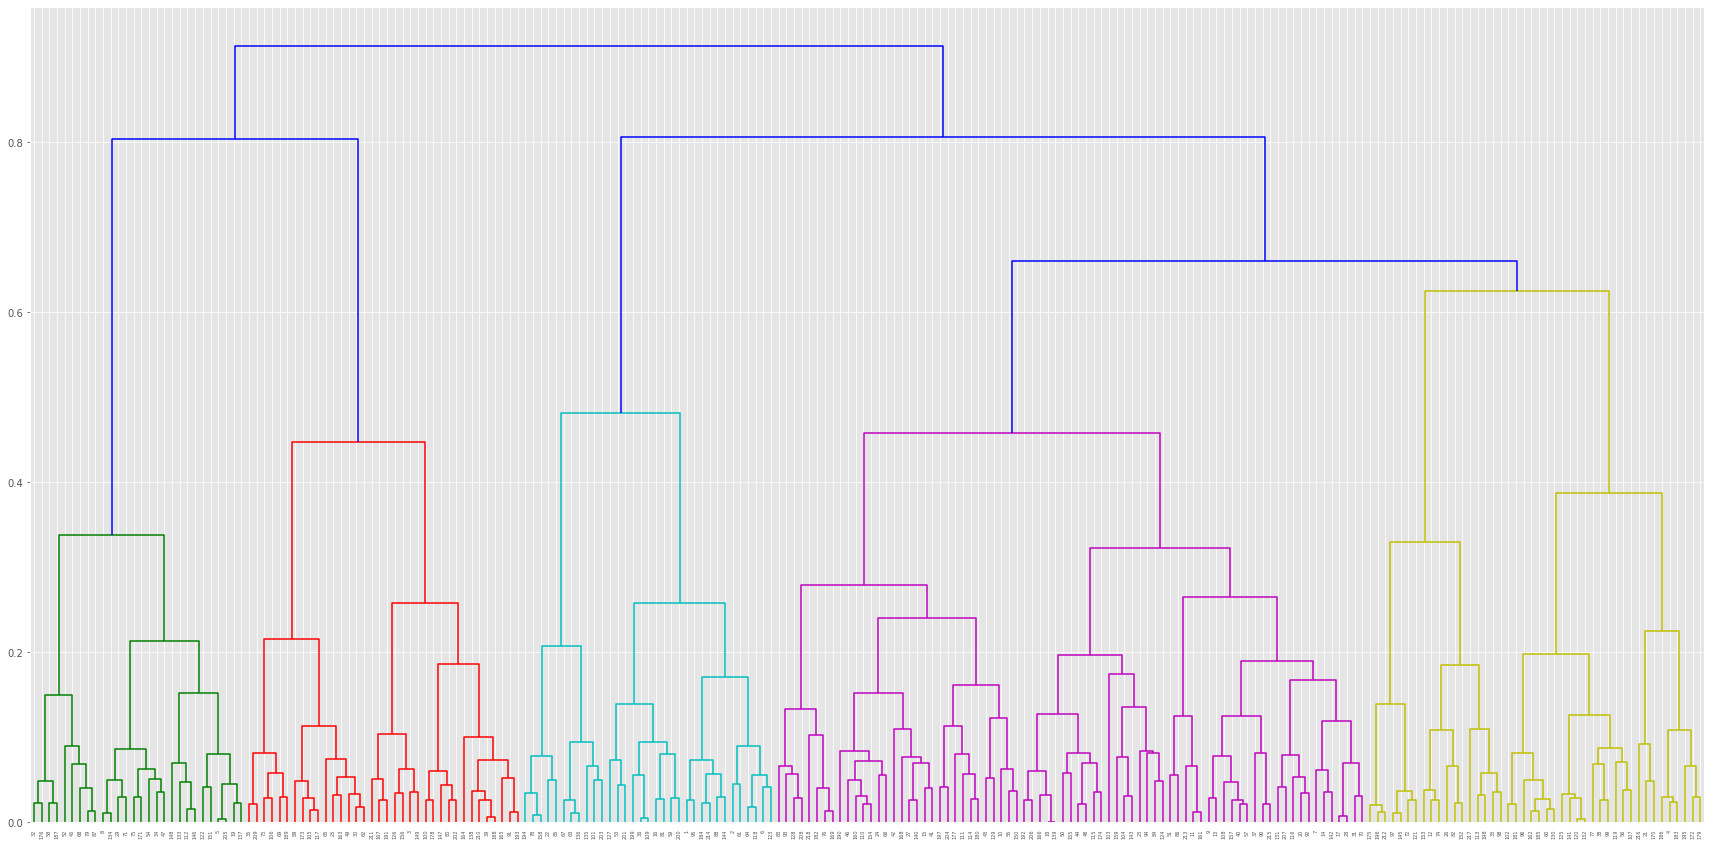

CPU times: user 4.01 s, sys: 168 ms, total: 4.18 s
Wall time: 4.17 s


In [25]:
%%time
linked = linkage(X, 'average')

labelList = range(1, 219)

plt.figure(figsize=(30, 15))  
dendrogram(linked,  
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

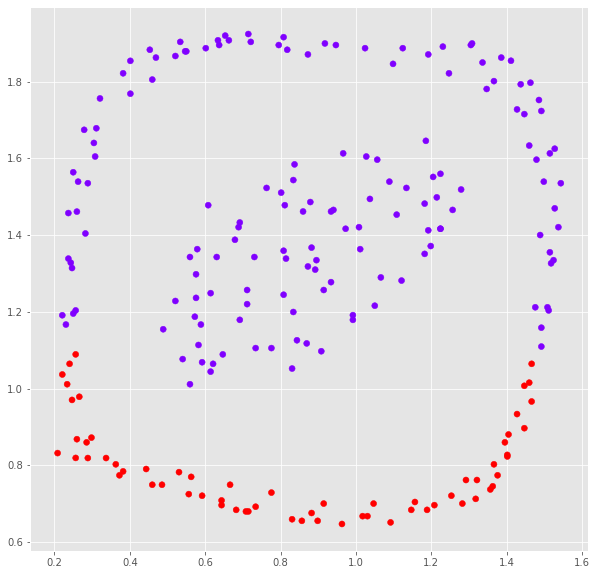

CPU times: user 283 ms, sys: 30 µs, total: 284 ms
Wall time: 281 ms


In [26]:
%%time
#----- validating agglomerative clustering values for all the above 
ac3 = AgglomerativeClustering(n_clusters = 2, linkage='average') 
  
# Visualizing the clustering 
plt.figure(figsize =(10, 10)) 
plt.scatter(data_b['X0'], data_b['X1'],  
           c = ac3.fit_predict(data_b), cmap ='rainbow') 
plt.show()

#### Distance between Centroids

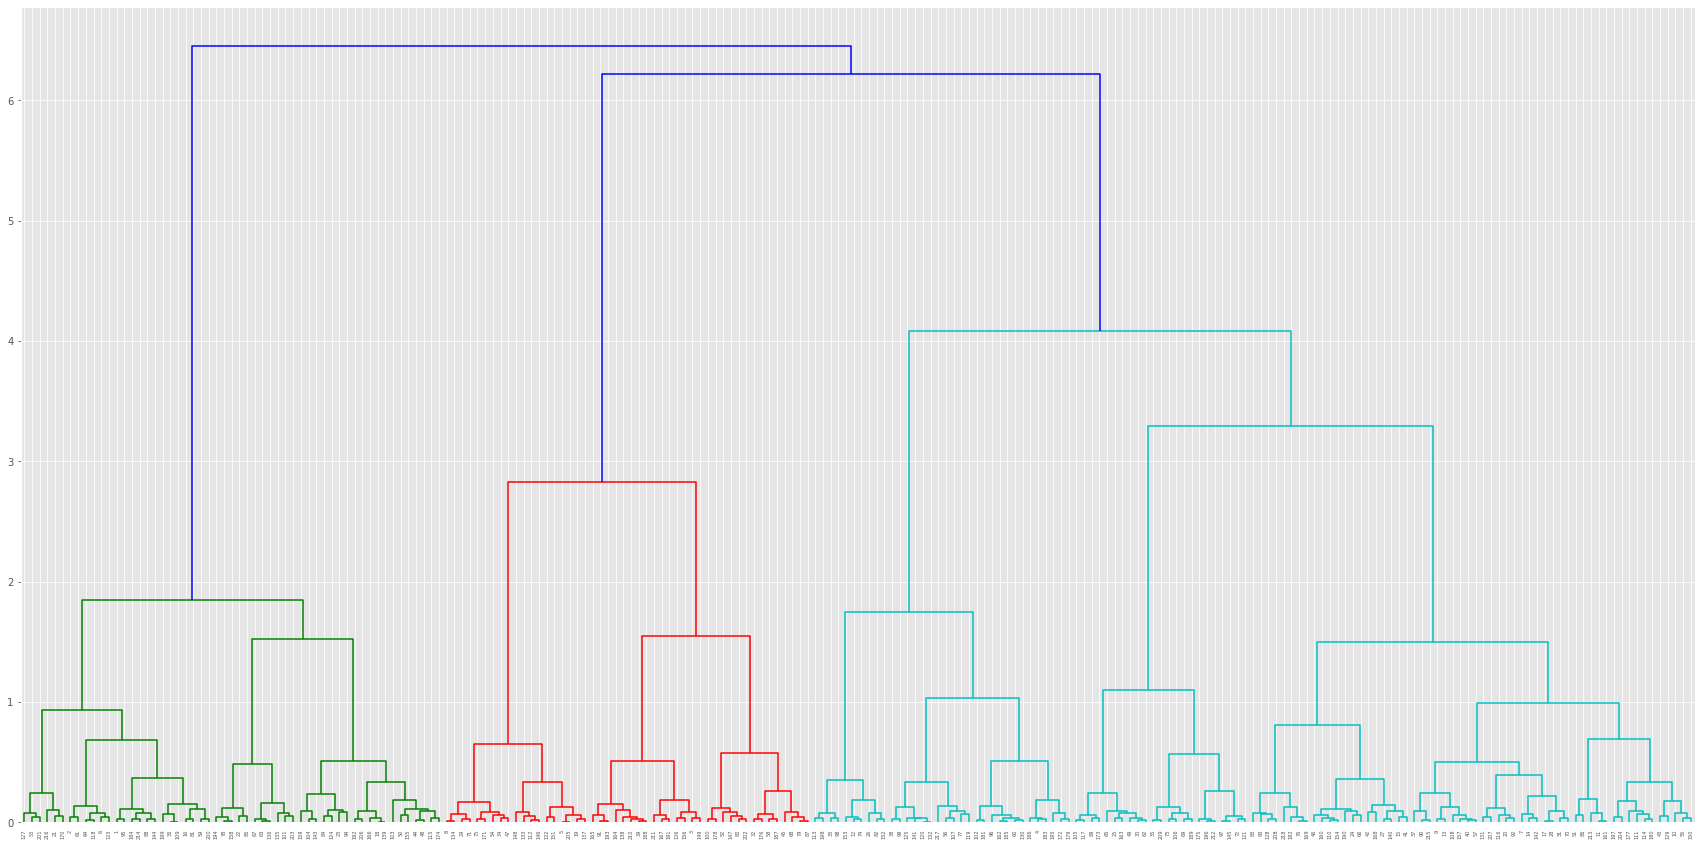

CPU times: user 3.96 s, sys: 116 ms, total: 4.07 s
Wall time: 4.07 s


In [27]:
%%time
linked = linkage(X, 'ward')

labelList = range(1, 219)

plt.figure(figsize=(30, 15))  
dendrogram(linked,  
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show() 

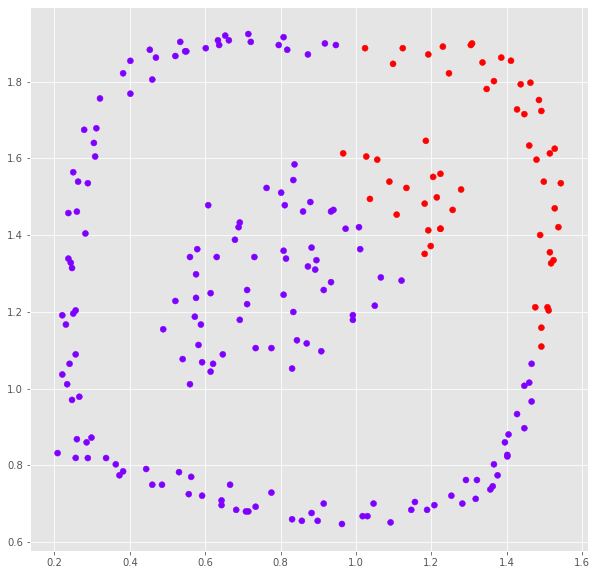

CPU times: user 210 ms, sys: 14 µs, total: 210 ms
Wall time: 207 ms


In [28]:
%%time
#----- validating agglomerative clustering values for all the above 
ac3 = AgglomerativeClustering(n_clusters = 2, linkage='ward') 
  
# Visualizing the clustering 
plt.figure(figsize =(10, 10)) 
plt.scatter(data_b['X0'], data_b['X1'],  
           c = ac3.fit_predict(data_b), cmap ='rainbow') 
plt.show()

#### ***Analysis and Conclusion***
Different inter-cluster similarity measure are performed with passing different arguments to the functions. Below are keywords used for for calculating inter-cluster similarity using the four functions.
> 1. MIN : 'single'
> 2. MAX : 'complete'
> 3. Group average : 'average' 
> 4. Distance between Centroids : 'ward'


From the above plots we can see that ***MIN*** measure gives us the desired solution. As MIN measure calculates the distance between the closest members of the two clusters. In this case it will give us a desired output.


### ***References***
---
1. Linkage, https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html
2. Agglomerative Clustering, https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html
3. Various Clustering Algorithm vizualization, https://youtu.be/uxmHoQ1DGPU
4. Hierarchical CLustering, https://newonlinecourses.science.psu.edu/stat505/lesson/14/14.4